In [1]:
import pandas as pd

df = pd.read_csv('dataframes/assignments_from_pool_42996583__29-05-2024.tsv', sep='\t')

df = pd.DataFrame({"title": df["INPUT:title"].tolist(),
 "img_path": df["INPUT:imagepath"].tolist(),
 "res1": df["OUTPUT:result1"].tolist(),
 "res2": df["OUTPUT:result2"].tolist(),
 "res3": df["OUTPUT:result3"].tolist(),
 "res4": df["OUTPUT:result4"].tolist()})

df = df.dropna()


/tmp/ipykernel_690027/2402868334.py:3: DtypeWarning: Columns (4,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataframes/assignments_from_pool_42996583__29-05-2024.tsv', sep='\t')


In [2]:
import pandas as pd



# Function to calculate mean values for each img_path
def calculate_mean_values(df):
    # Group by img_path and calculate mean for each group
    grouped_df = df.groupby("img_path").mean()
    
    # Rename columns to match the expected output
    grouped_df.columns = ["mos1", "mos2", "mos3", "mos4"]
    
    # Reset index to make img_path a column again
    grouped_df.reset_index(inplace=True)
    
    return grouped_df

# Add new columns with mean values
mean_values_df = calculate_mean_values(df)

# # Merge the original DataFrame with the mean values DataFrame
df = df.merge(mean_values_df, on="img_path", how="left")
df = df.drop_duplicates(subset=["img_path"])
# print(df)

/tmp/ipykernel_690027/2359251497.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby("img_path").mean()


In [3]:
df

,title,img_path,res1,res2,res3,res4,mos1,mos2,mos3,mos4
0,a black and white drawing of a man sitting o...,https://storage.yandexcloud.net/svg-images-fir...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,"a banana, lemon and a blueberry are shown",https://storage.yandexcloud.net/svg-images-fir...,5.0,2.0,1.0,1.0,5.0,3.5,3.0,3.0
2,a black background with a white clock on it,https://storage.yandexcloud.net/svg-images-fir...,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0
3,two checkered flags on a black background,https://storage.yandexcloud.net/svg-images-fir...,5.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0
4,a gift box with polka dots on it,https://storage.yandexcloud.net/svg-images-fir...,2.0,2.0,1.0,1.0,3.5,3.5,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
21291,a black background with a white clock on it,https://storage.yandexcloud.net/svg-images-fir...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
21292,a black background with a white clock on it,https://storage.yandexcloud.net/svg-images-fir...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0
21293,the united states map with all states highli...,https://storage.yandexcloud.net/svg-images-fir...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0
21294,the skull of the dead by james kennedy,https://storage.yandexcloud.net/svg-images-fir...,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0


In [4]:
df[df["img_path"] == "https://storage.yandexcloud.net/svg-images-first-pack/goodcibo00AbstractedPeerInclusionsvg.png"]

,title,img_path,res1,res2,res3,res4,mos1,mos2,mos3,mos4
12535,a circle of colored circles with a blue dot ...,https://storage.yandexcloud.net/svg-images-fir...,1.0,1.0,1.0,1.0,1.5,2.0,2.0,2.0


#### Попробуем получить какую-то человеческую оценку фотографий по имеющимся данным

Я понимаю что это вообще далеко от математики, но распределение похоже на нормальное - значит теплится надежда, что по итогу получится обучить на этом модельку

<Axes: >

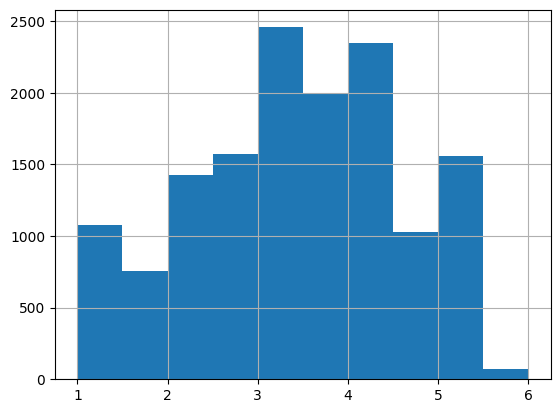

In [5]:
df.iloc[:, 6:].mean(1).hist()

In [6]:
df["final_mos"] = df.iloc[:, 6:].mean(1)

In [7]:
!mkdir dataframes

mkdir: cannot create directory ‘dataframes’: File exists


In [8]:
df.rename(columns={"img_path": "photo_url"}).to_csv("dataframes/parsed_toloka_dataset.csv", index=False)

In [11]:
print(pd.read_csv("dataframes/loaded_parsed_toloka_dataset.csv").head(3))

                                               title  \
0    a black and white drawing of a man sitting o...   
1          a banana, lemon and a blueberry are shown   
2        a black background with a white clock on it   

                                           photo_url  res1  res2  res3  res4  \
0  https://storage.yandexcloud.net/svg-images-fir...   1.0   1.0   1.0   1.0   
1  https://storage.yandexcloud.net/svg-images-fir...   5.0   2.0   1.0   1.0   
2  https://storage.yandexcloud.net/svg-images-fir...   1.0   1.0   3.0   1.0   

   mos1  mos2  mos3  mos4  final_mos  \
0   1.0   1.0   1.0   1.0      1.000   
1   5.0   3.5   3.0   3.0      3.625   
2   1.0   1.0   2.0   1.0      1.250   

                                            img_path  
0  /mnt/nvme0/jupyter-kazancev.danil7@wb-2ede4/pr...  
1  /mnt/nvme0/jupyter-kazancev.danil7@wb-2ede4/pr...  
2  /mnt/nvme0/jupyter-kazancev.danil7@wb-2ede4/pr...  


# Vector-images-quality-assessment-using-deep-learning

### Задачи (расположены поэтапно):
1) Сбор векторных изображений – parsers/main.py
2) Переименование и конвертация svg изображений в png расширение -- converting.py.
3) Некая статистика по разрешениям изобаржений и дальнейшая нормализация разрешений -- stata.py
4) Отчистка от дубликатов и нежелательных изображений -- clearing.py
5) Взятие эмбеддингов -- clipBlip/clipModel
6) Кластеризация -- clustering_models.py
7) Взятие описаний к изображениям -- clipBlip/blipModel

### Остальные файлы:
_paths.txt_ - для прописывания путей

_save_read.py_ - для храненения таких сущностей, как словари с очищенными/неочищенными эмбеддингами, получившиеся резульаты  кластеризации и т.д.

_visualization.py_ - функции для визуализации некоторых результатах.


### Сборка пайплайна:

#### Установка зависимостей:
```bash
conda create -n "nr_iqa" python=3.9
pip install -r base_requirements.txt
```

1) Прогоняете тетрадку 1_parse_data
2) Запускаете скрипт 2_load_data.py

Теперь ваши данные загружены в папку: toloka_parsed_data
Также по пути: "dataframes/loaded_parsed_toloka_dataset.csv" - у вас теперь есть датасет вот такой структуры:

```
                                               title  \
0    a black and white drawing of a man sitting o...   
1          a banana, lemon and a blueberry are shown   
2        a black background with a white clock on it   

                                           photo_url  res1  res2  res3  res4  \
0  https://storage.yandexcloud.net/svg-images-fir...   1.0   1.0   1.0   1.0   
1  https://storage.yandexcloud.net/svg-images-fir...   5.0   2.0   1.0   1.0   
2  https://storage.yandexcloud.net/svg-images-fir...   1.0   1.0   3.0   1.0   

   mos1  mos2  mos3  mos4  final_mos  \
0   1.0   1.0   1.0   1.0      1.000   
1   5.0   3.5   3.0   3.0      3.625   
2   1.0   1.0   2.0   1.0      1.250   

                                            img_path  
0  /mnt/nvme0/jupyter-kazancev.danil7@wb-2ede4/pr...  
1  /mnt/nvme0/jupyter-kazancev.danil7@wb-2ede4/pr...  
2  /mnt/nvme0/jupyter-kazancev.danil7@wb-2ede4/pr...  

```
